In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('/home/b/data/Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls', sheet_name=None)

In [3]:
data.keys()

odict_keys(['Lisez moi', 'Nomenclature des PS', 'Spécialistes', 'Généralistes et MEP', 'Dentistes et ODF', 'Sages-femmes', 'Auxiliaires médicaux', 'Laboratoires'])

In [4]:
df = list(data.values())[3]

In [5]:
df.columns

Index(['Généralistes et compétences MEP', 'DEPARTEMENT', 'EFFECTIFS',
       'HONORAIRES SANS DEPASSEMENT (Euros)', 'DEPASSEMENTS (Euros)',
       'FRAIS DE DEPLACEMENT (Euros)', 'TOTAL DES HONORAIRES (Euros)'],
      dtype='object')

In [6]:
df.dtypes

Généralistes et compétences MEP        object
DEPARTEMENT                            object
EFFECTIFS                               int64
HONORAIRES SANS DEPASSEMENT (Euros)    object
DEPASSEMENTS (Euros)                   object
FRAIS DE DEPLACEMENT (Euros)           object
TOTAL DES HONORAIRES (Euros)           object
dtype: object

In [7]:
df['depassement'] = df.loc[df['DEPASSEMENTS (Euros)']!='nc']['DEPASSEMENTS (Euros)'].astype('float')

In [8]:
df['depassement_moyen'] = df.depassement / df.EFFECTIFS

In [9]:
df_depassement_moy = df[df.EFFECTIFS>0].groupby('DEPARTEMENT').mean().copy()

In [10]:
df_depassement_moy['No'] = df_depassement_moy.index.str.extract('([^-]+)').values

In [11]:
superficie_dep = pd.read_html('http://france.ousuisje.com/departements/classement/superficie.php')[0]

In [12]:
superficie_dep.head()

,Département / No / Région,Superficie [en km²],Population,Densite [hab. /km²]
0,Guyane (973) [Guyane],86 504,230 000,4
1,Gironde (33) [Aquitaine],10 000,1 376 000,138
2,Landes (40) [Aquitaine],9 243,327 334,35
3,Dordogne (24) [Aquitaine],9 060,401 500,43
4,Côte-d'Or (21) [Bourgogne],8 763,506 755,58


In [13]:
superficie_dep[['departement','No','region']] = superficie_dep['Département / No / Région'].str.extract(r'([^\(]+)(\(\d+\w*\))(.+)')

In [14]:
superficie_dep['No'] = superficie_dep['No'].str.replace(r'[\(\)]','')

In [15]:
merge = pd.merge(df_depassement_moy,superficie_dep,on='No', how='inner')

In [16]:
merge['superficie'] = merge['Superficie [en km²]'].str.replace('\xa0','').astype('int')

In [17]:
merge['densite_medecin_dpt'] = merge.EFFECTIFS / merge.superficie

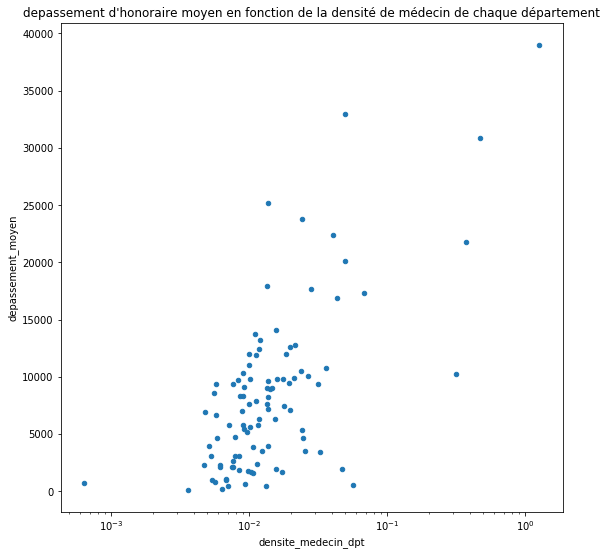

In [19]:
merge.plot(x = 'densite_medecin_dpt', y = 'depassement_moyen', kind = 'scatter', logx=True, figsize=(9,9),title = "depassement d'honoraire moyen en fonction de la densité de médecin de chaque département")

In [222]:
import matplotlib.pyplot as plt

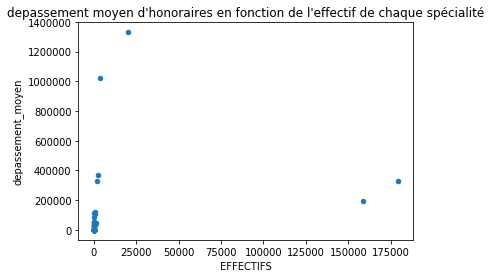

In [20]:
df.groupby('Généralistes et compétences MEP').sum().plot(x=0, y=2, kind="scatter", title= "depassement moyen d'honoraires en fonction de l'effectif de chaque spécialité")

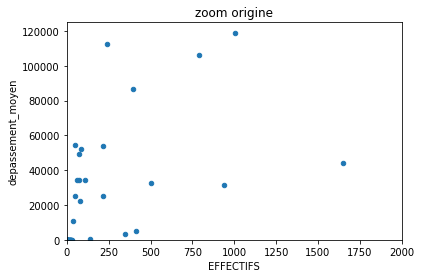

In [22]:
df.groupby('Généralistes et compétences MEP').sum().plot(x=0, y=2, kind="scatter", xlim= (0,2000), ylim = (0,125000), title = "zoom origine")